# Практика 5
Корешков

```
Александр, [06.10.2023 16:36]
За допомогою формули Лагранжа побудувати
інтерполяційний многочлен для функції, що задана наступною таблицею
xi  –2  –1  0  1  2
fi  2  –1  1/2  3  -4
Обчислити значення в точці 
1) Корешков Михайло   x=1,5.
2) Лазоренко Яна    x=-0,5.
3) Макаренко Владислав  x=-1,5.
4) Прокопенко Федір   x=0,5.
5) Хохлов Ярослав     x=-2,5.

Александр, [06.10.2023 16:38]
* спробувати відновити функцію (побудувавши графік) обрахувавши по три рівномірно розташовані між вузлами точки.
```

---

In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from collections import namedtuple 

def _(*args): return np.array([*args])


In [7]:
xi = _(-2, -1, 0, 1, 2)
yi = _(2, -1, 1/2, 3, -4)
X0 = 1.5

Я будуватиму інтерполяційний поліном у формі Лагранжа.

In [8]:
def prepare_lagrange(xs, ys):
    n = len(xs)
    C = []
    for k in range(0, n):
        c_k = 1
        for i in range(0, n):
            if i == k:
                continue
            c_k *= (xs[k] - xs[i])
        C.append( ys[k] / c_k )
        
    return C

def evaluate_lagrange(C, xs, ys, x, eps=1e-4):
    # d = np.abs(xs - x)
    # di, dm = np.argmin(d), np.min(d)
    # if dm < eps:
    #     return ys[di]
    
    n = len(C)
    y = 0
    for k in range(0,n):
        dx = 1
        for i in range(0, n):
            if i==k:
                continue
            dx *= (x - xs[i])
        y += C[k] * dx
    
    return y

Зверну увагу, що для ефективності обчислень тут заздалегідь обчислюються та зберігаються сталі $C_i$

Обчислюємо $C_i$ та інтерполяційний поліном в точці $1.5$

L(x) = 1.6171875


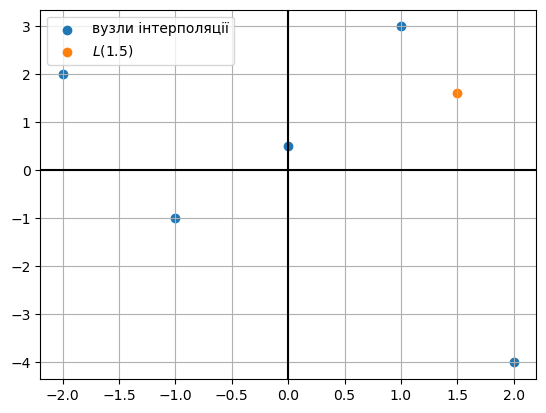

In [16]:
c1 = prepare_lagrange(xi, yi)

Y0 = evaluate_lagrange(c1, xi, yi, X0)
print(f"L(x) = {Y0}")

plt.scatter(xi, yi, label="вузли інтерполяції")
plt.scatter([X0], [Y0], label="$L(1.5)$")
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()

Маємо наближення 
$$L(1.5) = 1.6171875$$

Спробуємо відтворити функцію. Обчислимо по три точки інтерполяційного полінома між кожними двома вузлами.

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


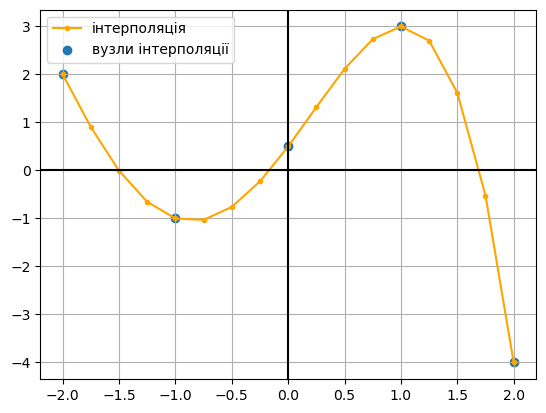

In [25]:
X = np.array([], dtype=np.float64)
x0 = xi[0]
for x1 in xi[1:]:
    X = np.hstack([X, np.linspace(x0, x1, 4, endpoint=False)])
    x0 = x1
X = np.hstack([X, [x1]])
print(X)

Y = []
for x in X:
    Y.append(evaluate_lagrange(c1, xi, yi, x))

plt.plot(X, Y, '.-', label="інтерполяція", c='orange')
plt.scatter( xi, yi, label="вузли інтерполяції" )
plt.grid()
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.legend()